In [3]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

In [2]:
pip install "numpy<2"

   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
    --------------------------------------- 0.3/15.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/15.5 MB 989.2 kB/s eta 0:00:16
   -- ------------------------------------- 0.8/15.5 MB 1.3 MB/s eta 0:00:12
   --- ------------------------------------ 1.3/15.5 MB 1.3 MB/s eta 0:00:11
   ---- ----------------------------------- 1.6/15.5 MB 1.3 MB/s eta 0:00:11
   ---- ----------------------------------- 1.8/15.5 MB 1.3 MB/s eta 0:00:11
   ---- ----------------------------------- 1.8/15.5 MB 1.3 MB/s eta 0:00:11
   ----- ---------------------------------- 2.1/15.5 MB 1.3 MB/s eta 0:00:11
   ----- ---------------------------------- 2.1/15.5 MB 1.3 MB/s eta 0:00:11
   ------ --------------------------------- 2.4/15.5 MB 1.1 MB/s eta 0:00:12
   ------ --------------------------------- 2.6/15.5 MB 1.1 MB/s eta 0:00:12
   ------- -------

  You can safely remove it manually.
  You can safely remove it manually.


In [4]:
train_df = pd.read_csv("D:\\ALX Data Science\\Data Science Track\\08. Unsupervised Learning\Week 4\\11. Kaggle Movies recommender system\\alx-movie-recommendation-project-2025\\train.csv")
movies_df = pd.read_csv("D:\\ALX Data Science\\Data Science Track\\08. Unsupervised Learning\Week 4\\11. Kaggle Movies recommender system\\alx-movie-recommendation-project-2025\\movies.csv")
imdb_df = pd.read_csv("D:\\ALX Data Science\\Data Science Track\\08. Unsupervised Learning\Week 4\\11. Kaggle Movies recommender system\\alx-movie-recommendation-project-2025\\imdb_data.csv")
test_df = pd.read_csv("D:\\ALX Data Science\\Data Science Track\\08. Unsupervised Learning\Week 4\\11. Kaggle Movies recommender system\\alx-movie-recommendation-project-2025\\test.csv")
links_df = pd.read_csv("D:\\ALX Data Science\\Data Science Track\\08. Unsupervised Learning\Week 4\\11. Kaggle Movies recommender system\\alx-movie-recommendation-project-2025\\links.csv")
tags = pd.read_csv("D:\\ALX Data Science\\Data Science Track\\08. Unsupervised Learning\Week 4\\11. Kaggle Movies recommender system\\alx-movie-recommendation-project-2025\\tags.csv")
genome_scores = pd.read_csv("D:\\ALX Data Science\\Data Science Track\\08. Unsupervised Learning\Week 4\\11. Kaggle Movies recommender system\\alx-movie-recommendation-project-2025\\genome_scores.csv")
genome_tags = pd.read_csv("D:\\ALX Data Science\\Data Science Track\\08. Unsupervised Learning\Week 4\\11. Kaggle Movies recommender system\\alx-movie-recommendation-project-2025\\genome_tags.csv")
sample_submissions = pd.read_csv("D:\\ALX Data Science\\Data Science Track\\08. Unsupervised Learning\Week 4\\11. Kaggle Movies recommender system\\alx-movie-recommendation-project-2025\\sample_submission.csv")

In [19]:
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [5]:
new_df = train_df.merge(movies_df, on='movieId')
new_df

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller
...,...,...,...,...,...,...
10000033,136395,99114,5.0,1521235092,Django Unchained (2012),Action|Drama|Western
10000034,140078,553,3.0,1002580977,Tombstone (1993),Action|Drama|Western
10000035,154807,56782,4.0,1227674807,There Will Be Blood (2007),Drama|Western
10000036,85805,327,4.0,1479921530,Tank Girl (1995),Action|Comedy|Sci-Fi


In [17]:
movies_df.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
links_df.head()


(62423, 3)

In [26]:
imdb_df.head()


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [25]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [24]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [35]:
print("Train: ")
print(str(train_df.isnull().sum()))
print("************")
print("Test: ")
print(str(test_df.isnull().sum()))
print("************")
print("Movies: ")
print(str(movies_df.isnull().sum()))
print("************")
print("Links: ")
print(str(links_df.isnull().sum()))
print("************")
print("IMDB: ")
print(str(imdb_df.isnull().sum()))
print("************")
print("Genome scores: ")
print(str(genome_scores.isnull().sum()))
print("************")
print("Genome tags: ")
print(str(genome_tags.isnull().sum()))

Train: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
************
Test: 
userId     0
movieId    0
dtype: int64
************
Movies: 
movieId    0
title      0
genres     0
dtype: int64
************
Links: 
movieId      0
imdbId       0
tmdbId     107
dtype: int64
************
IMDB: 
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64
************
Genome scores: 
movieId      0
tagId        0
relevance    0
dtype: int64
************
Genome tags: 
tagId    0
tag      0
dtype: int64


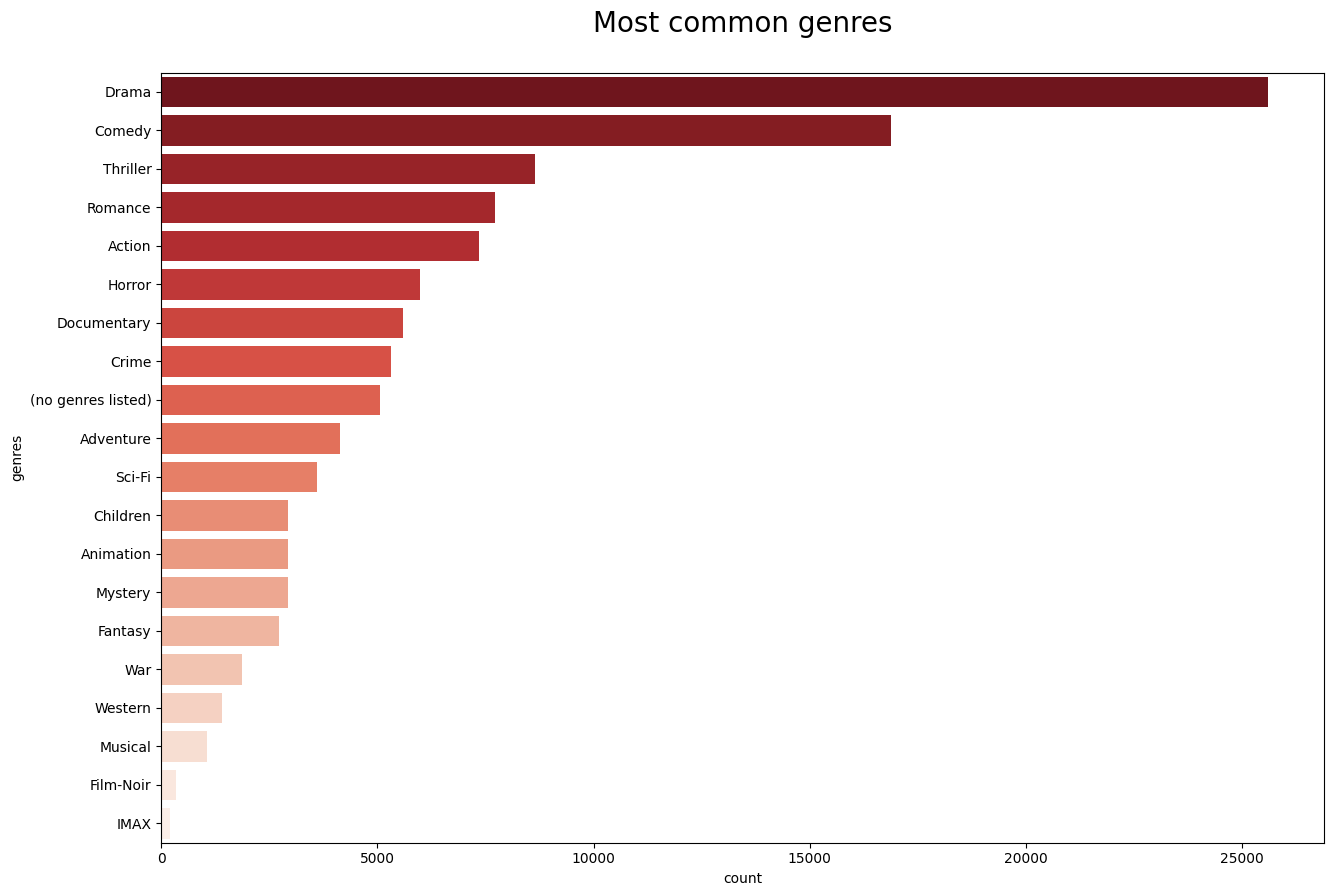

In [37]:
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette='Reds_r')
plt.show()

In [22]:
test_df

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318
...,...,...
5000014,162541,4079
5000015,162541,4467
5000016,162541,4980
5000017,162541,5689


In [26]:
from surprise import Dataset
from surprise import Reader

# Assuming train_df and test_df are Pandas DataFrames with columns: user, item, rating
reader = Reader(rating_scale=(0.5, 5))  # Adjust the rating scale as needed
train_data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)

# Build the trainset
trainset = train_data.build_full_trainset()



In [29]:

# Initialize and train the SVD algorithm
algo = SVD()
algo.fit(trainset)

testset = list(zip(test_df['userId'], test_df['movieId'], [None] * len(test_df)))


# Predict the rating for user 1 and book 6


In [30]:
predictions = []
for _, row in test_df.iterrows():
    uid = row['userId']
    iid = row['movieId']
    pred = algo.predict(uid, iid)
    predictions.append((uid, iid, pred.est))  # Store user, item, and predicted rating

# Convert predictions to a DataFrame
predicted_ratings = pd.DataFrame(predictions, columns=['userId', 'movieId', 'rating'])
print(predicted_ratings)



         userId  movieId    rating
0             1     2011  3.269416
1             1     4144  3.946552
2             1     5767  3.677580
3             1     6711  3.893546
4             1     7318  3.061759
...         ...      ...       ...
5000014  162541     4079  3.300561
5000015  162541     4467  3.995106
5000016  162541     4980  3.159127
5000017  162541     5689  2.948008
5000018  162541     7153  4.929137

[5000019 rows x 3 columns]


In [ ]:
my_submission = pd.DataFrame(predicted_ratings['userId'].astype(str) +'_' + predicted_ratings['movieId'].astype(str))
my_submission

,0
0,1_2011
1,1_4144
2,1_5767
3,1_6711
4,1_7318
...,...
5000014,162541_4079
5000015,162541_4467
5000016,162541_4980
5000017,162541_5689


In [45]:
my_submission.rename(columns={0: 'Id'}, inplace=True)
my_submission

,Id,rating
0,1_2011,3.269416
1,1_4144,3.946552
2,1_5767,3.677580
3,1_6711,3.893546
4,1_7318,3.061759
...,...,...
5000014,162541_4079,3.300561
5000015,162541_4467,3.995106
5000016,162541_4980,3.159127
5000017,162541_5689,2.948008


In [46]:
my_submission.to_csv('submission.csv', index=False)

In [31]:

# Evaluate the model
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

ValueError: not enough values to unpack (expected 5, got 3)

In [ ]:
# Function to get collaborative recommendations for a user profile
def get_collaborative_recommendations(user_id, algo, books, ratings_df, n=10):
    recommendations = []
    book_ids = books['bookId'].unique()

    # Get books the user has already rated
    rated_books = ratings_df[ratings_df['userId'] == user_id]['bookId'].tolist()

    for book_id in book_ids:
        # Skip books the user has already rated
        if book_id in rated_books:
            continue

        # Predict the rating for the user and book
        prediction = algo.predict(user_id, book_id)
        recommendations.append((books[books['bookId'] == book_id]['title'].values[0], prediction.est))

    # Sort recommendations by predicted rating (highest first)
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)

    return recommendations[:n]

# Generate recommendations for each user profile and collect them in a list
all_recommendations = []

for user_id in user_profiles.keys():
    recommendations = get_collaborative_recommendations(user_id, algo, books, ratings_df)
    for title, predicted_rating in recommendations:
        all_recommendations.append({
            'userId': user_id,
            'Recommended Book': title,
            'Predicted_Rating': predicted_rating
        })

# Convert the list of recommendations to a DataFrame
recommendations_df = pd.DataFrame(all_recommendations)

# Display the recommendations
print(recommendations_df)

   userId        Recommended Book  Predicted_Rating
0       1   To Kill a Mockingbird          3.795694
1       1             Animal farm          3.795694
2       1            Harry Potter          3.795694
3       1  The Catcher in the Rye          3.789322
4       2                    1984          3.834863
5       2             Animal farm          3.695682
6       2            Harry Potter          3.695682
7       2     Pride and Prejudice          3.586175


In [51]:
new_df['rating'].value_counts()

rating
4.0    2652977
3.0    1959759
5.0    1445230
3.5    1270642
4.5     880516
2.0     656821
2.5     505578
1.0     311213
1.5     159731
0.5     157571
Name: count, dtype: int64

In [6]:
n_ratings = len(new_df)
n_movies = new_df['movieId'].nunique()
n_users = new_df['userId'].nunique()


print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 10000038
Number of unique movieId's: 48213
Number of unique users: 162541
Average number of ratings per user: 61.52
Average number of ratings per movie: 207.41


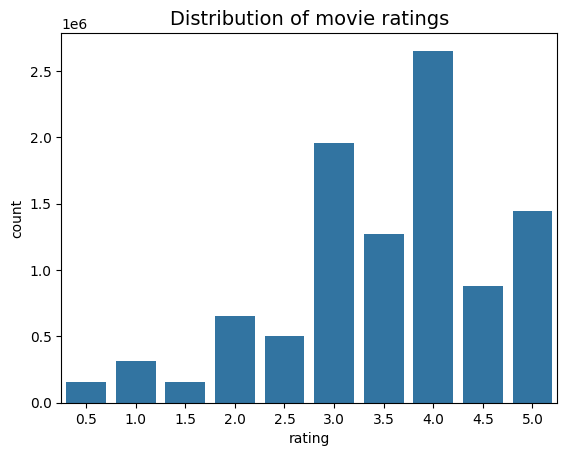

In [7]:
sns.countplot(x='rating', data=new_df)
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

In [8]:
print(f"Mean global rating: {round(new_df['rating'].mean(),2)}.")

Mean global rating: 3.53.


In [9]:
mean_rating = new_df.groupby('userId')['rating'].mean()
print(f"Mean rating per user: {round(mean_rating.mean(),2)}.")

Mean rating per user: 3.68.


In [10]:
new_df['title'].value_counts()[0:10]

title
Shawshank Redemption, The (1994)             32831
Forrest Gump (1994)                          32383
Pulp Fiction (1994)                          31697
Silence of the Lambs, The (1991)             29444
Matrix, The (1999)                           29014
Star Wars: Episode IV - A New Hope (1977)    27560
Jurassic Park (1993)                         25518
Schindler's List (1993)                      24004
Braveheart (1995)                            23722
Fight Club (1999)                            23536
Name: count, dtype: int64

In [11]:
#Average rating for each movie
mean_movie_rating = new_df.groupby('movieId')[['rating']].mean()
lowest_rated = mean_movie_rating['rating'].idxmin()
highest_rated = mean_movie_rating['rating'].idxmax()
lowest_rated


5757

In [12]:
new_df[new_df['movieId'] == lowest_rated]

,userId,movieId,rating,timestamp,title,genres
6782866,106897,5757,0.5,1202081810,History of Kim Skov (Historien om Kim Skov) (1...,Documentary|Drama


In [13]:
new_df[new_df['movieId'] == highest_rated]
#YOu can find that this movie is high-rated but it is just ratedone time!

,userId,movieId,rating,timestamp,title,genres
3913468,124635,3234,5.0,1047315411,Train Ride to Hollywood (1975),Comedy|Fantasy|Musical


In [14]:
movie_stats = new_df.groupby('movieId')['rating'].agg(['count', 'mean'])
movie_stats

,count,mean
movieId,,
1,23062,3.889971
2,9654,3.263414
3,4727,3.132325
4,968,2.878099
5,4648,3.059165
...,...,...
209145,1,1.000000
209153,1,2.500000
209159,1,3.000000


In [15]:
C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()

print(f"Average number of ratings for a given movie: {C:.2f}")
print(f"Average rating for a given movie: {m:.2f}")


Average number of ratings for a given movie: 207.41
Average rating for a given movie: 3.10


In [16]:
def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return round(bayesian_avg, 3)

In [17]:
bayesian_avg_rating = new_df.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_rating.columns = ['movieId', 'bayesian_avg']
movie_stats = movie_stats.merge(bayesian_avg_rating, on='movieId')
movie_stats

,movieId,count,mean,bayesian_avg
0,1,23062,3.889971,3.883
1,2,9654,3.263414,3.260
2,3,4727,3.132325,3.131
3,4,968,2.878099,2.917
4,5,4648,3.059165,3.061
...,...,...,...,...
48208,209145,1,1.000000,3.090
48209,209153,1,2.500000,3.097
48210,209159,1,3.000000,3.100
48211,209169,1,3.000000,3.100


In [18]:
movie_stats = movie_stats.merge(movies_df[['movieId', 'title']])


In [19]:
movie_stats.sort_values(by='bayesian_avg', ascending=False)

,movieId,count,mean,bayesian_avg,title
314,318,32831,4.417624,4.409,"Shawshank Redemption, The (1994)"
840,858,20960,4.311355,4.299,"Godfather, The (1972)"
49,50,22032,4.278073,4.267,"Usual Suspects, The (1995)"
1190,1221,13525,4.274085,4.256,"Godfather: Part II, The (1974)"
522,527,24004,4.247625,4.238,Schindler's List (1993)
...,...,...,...,...,...
1501,1556,2127,1.908087,2.014,Speed 2: Cruise Control (1997)
1688,1760,1036,1.793919,2.012,Spice World (1997)
6457,6587,307,1.200326,1.966,Gigli (2003)
11310,50798,483,1.467909,1.958,Epic Movie (2007)


In [20]:
new_df

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller
...,...,...,...,...,...,...
10000033,136395,99114,5.0,1521235092,Django Unchained (2012),Action|Drama|Western
10000034,140078,553,3.0,1002580977,Tombstone (1993),Action|Drama|Western
10000035,154807,56782,4.0,1227674807,There Will Be Blood (2007),Drama|Western
10000036,85805,327,4.0,1479921530,Tank Girl (1995),Action|Comedy|Sci-Fi


In [21]:
new_df['genres'] = new_df['genres'].apply(lambda x: x.split('|'))
new_df

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]"
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),[Comedy]
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,"[Action, Comedy, Sci-Fi]"
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),"[Adventure, Comedy, Crime]"
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,"[Drama, Horror, Mystery, Thriller]"
...,...,...,...,...,...,...
10000033,136395,99114,5.0,1521235092,Django Unchained (2012),"[Action, Drama, Western]"
10000034,140078,553,3.0,1002580977,Tombstone (1993),"[Action, Drama, Western]"
10000035,154807,56782,4.0,1227674807,There Will Be Blood (2007),"[Drama, Western]"
10000036,85805,327,4.0,1479921530,Tank Girl (1995),"[Action, Comedy, Sci-Fi]"


In [22]:
from collections import Counter

genre_frequency = Counter(g for genres in new_df['genres'] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 20 genres.


Counter({'Drama': 4384454,
         'Comedy': 3570248,
         'Action': 2979298,
         'Thriller': 2703433,
         'Adventure': 2333917,
         'Romance': 1798473,
         'Sci-Fi': 1728669,
         'Crime': 1674612,
         'Fantasy': 1133943,
         'Children': 848710,
         'Mystery': 805277,
         'Horror': 756757,
         'Animation': 653001,
         'War': 506648,
         'IMAX': 424834,
         'Musical': 385695,
         'Western': 193496,
         'Documentary': 128742,
         'Film-Noir': 99186,
         '(no genres listed)': 10651})

In [23]:
genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns = ['genre', 'count']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Action'),
  Text(3, 0, 'Thriller'),
  Text(4, 0, 'Adventure'),
  Text(5, 0, 'Romance'),
  Text(6, 0, 'Sci-Fi'),
  Text(7, 0, 'Crime'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'Children'),
  Text(10, 0, 'Mystery'),
  Text(11, 0, 'Horror'),
  Text(12, 0, 'Animation'),
  Text(13, 0, 'War'),
  Text(14, 0, 'IMAX'),
  Text(15, 0, 'Musical'),
  Text(16, 0, 'Western'),
  Text(17, 0, 'Documentary'),
  Text(18, 0, 'Film-Noir'),
  Text(19, 0, '(no genres listed)')])

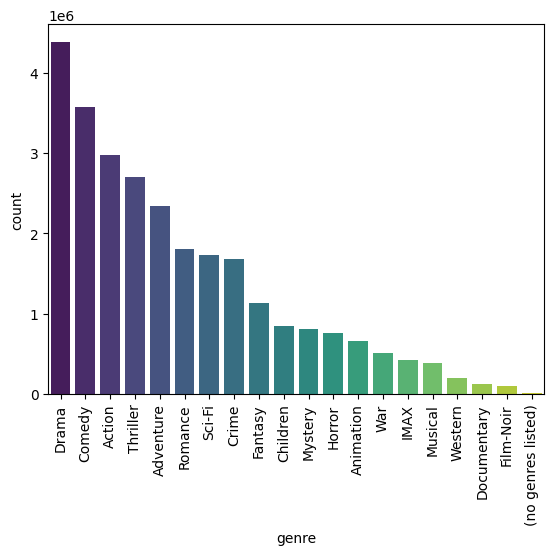

In [24]:
sns.barplot(x='genre', y='count', data=genre_frequency_df.sort_values(by='count', ascending=False), palette='viridis')
plt.xticks(rotation=90)

In [25]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    M = df['userId'].nunique()
    N = df['movieId'].nunique()

    user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))
    
    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(new_df)

In [26]:
X.shape

(162541, 48213)

In [103]:
new_df['movieId'].nunique()

48213

In [27]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 0.13%


In [28]:
n_ratings_per_user = X.getnnz(axis=1)
len(n_ratings_per_user)

162541

In [29]:
print(f"Most active user rated {n_ratings_per_user.max()} movies.")
print(f"Least active user rated {n_ratings_per_user.min()} movies.")

Most active user rated 12952 movies.
Least active user rated 1 movies.


In [30]:
n_ratings_per_movie = X.getnnz(axis=0)
len(n_ratings_per_movie)

48213

In [31]:
print(f"Most rated movie has {n_ratings_per_movie.max()} ratings.")
print(f"Least rated movie has {n_ratings_per_movie.min()} ratings.")

Most rated movie has 32831 ratings.
Least rated movie has 1 ratings.


In [32]:
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given movie id.
    
    Args:
        movie_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations
    
    Output: returns list of k similar movie ID's
    """
    X = X.T
    neighbour_ids = []
    
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [33]:
similar_movies = find_similar_movies(1, X, movie_mapper, movie_inv_mapper, k=10)
similar_movies

[260, 3114, 1270, 356, 588, 480, 1210, 780, 364]

In [35]:
movie_titles = dict(zip(new_df['movieId'], new_df['title']))


In [36]:
movie_id = 1

similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, metric='cosine', k=10)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Toy Story (1995):
Star Wars: Episode IV - A New Hope (1977)
Toy Story 2 (1999)
Back to the Future (1985)
Forrest Gump (1994)
Aladdin (1992)
Jurassic Park (1993)
Star Wars: Episode VI - Return of the Jedi (1983)
Independence Day (a.k.a. ID4) (1996)
Lion King, The (1994)


In [114]:
similar_movies

[260, 3114, 1270, 356, 588, 480, 1210, 780, 364]

In [38]:
genres = set(g for G in new_df['genres'] for g in G)

for g in genres:
    movies_df[g] = movies_df.genres.transform(lambda x:int(g in x))
    

In [39]:
movie_genres = movies_df.drop(columns=['movieId', 'title','genres'])
movie_genres

,Comedy,Thriller,(no genres listed),Crime,Western,Drama,Mystery,War,Children,Musical,Adventure,Action,Fantasy,Romance,Animation,Sci-Fi,Film-Noir,Horror,Documentary,IMAX
0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62418,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
62419,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
62420,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
62421,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [126]:
movie_genres = movie_genres.astype(np.int16)  # Reduce precision


In [40]:
from annoy import AnnoyIndex

# Assuming movie_genres has shape (n_movies, n_features)
n_features = movie_genres.shape[1]

# Build Annoy index
annoy_index = AnnoyIndex(n_features, metric='angular')  # Angular distance is related to cosine similarity
for i in range(movie_genres.shape[0]):
    annoy_index.add_item(i, movie_genres[i])

annoy_index.build(10)  # 10 trees

# Query for approximate nearest neighbors
n_neighbors = 10  # Number of neighbors to retrieve
cosine_sim = np.zeros((movie_genres.shape[0], n_neighbors))
for i in range(movie_genres.shape[0]):
    neighbors, distances = annoy_index.get_nns_by_item(i, n_neighbors, include_distances=True)
    cosine_sim[i] = 1 - np.array(distances)  # Convert angular distance to cosine similarity

print(f"Dimensions of approximate cosine similarity matrix: {cosine_sim.shape}")

KeyError: 0

In [42]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=20  , n_iter=10 )
Q = svd.fit_transform(X.T)
Q.shape

(48213, 20)

In [43]:
X.shape

(162541, 48213)

In [44]:
movie_id = 1
similar_movies = find_similar_movies(movie_id, Q.T, movie_mapper, movie_inv_mapper, metric='cosine', k=10)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Toy Story (1995):
Willy Wonka & the Chocolate Factory (1971)
Independence Day (a.k.a. ID4) (1996)
Mission: Impossible (1996)
Toy Story 2 (1999)
James and the Giant Peach (1996)
Hunchback of Notre Dame, The (1996)
Nutty Professor, The (1996)
Twister (1996)
Birdcage, The (1996)
